In [1]:
!pip install mplfinance

     |████████████████████████████████| 61kB 5.5MB/s 


In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

uploaded = files.upload()

Saving SPFB.RTS-12.18_180913_180913.txt to SPFB.RTS-12.18_180913_180913.txt


In [3]:
dt = pd.read_csv(list(uploaded)[0])

for x in range(0, len(dt)):
  dt['<TIME>'][x] = dt['<TIME>'][x]/10000 * 3600
dt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20180913,36000,105890.0,107050.0,105890.0,106970.0,1725
1,20180913,39600,106970.0,107150.0,106820.0,107030.0,1626
2,20180913,43200,107020.0,107410.0,106980.0,107240.0,1905
3,20180913,46800,107270.0,107510.0,107270.0,107430.0,721
4,20180913,50400,107550.0,108110.0,107550.0,107930.0,1632
5,20180913,54000,107950.0,108270.0,107730.0,108180.0,934
6,20180913,57600,108200.0,108740.0,108080.0,108450.0,1946
7,20180913,61200,108480.0,108540.0,106770.0,107300.0,3918
8,20180913,64800,107290.0,107860.0,106810.0,107020.0,1831
9,20180913,68400,107030.0,107520.0,107000.0,107270.0,709


In [4]:
dt['Time'] = dt['<TIME>']
dt['Open'] = dt['<OPEN>']
dt['High'] = dt['<HIGH>']
dt['Close'] = dt['<CLOSE>']
dt['Low'] = dt['<LOW>']

ohlc = dt.loc[:, ['Time',	'Open',	'High', 'Low',	'Close']]
ohlc['Time'] = pd.to_datetime(ohlc['Time'], unit='s')
ohlc = ohlc.set_index('Time')
ohlc

,Open,High,Low,Close
Time,,,,
1970-01-01 10:00:00,105890.0,107050.0,105890.0,106970.0
1970-01-01 11:00:00,106970.0,107150.0,106820.0,107030.0
1970-01-01 12:00:00,107020.0,107410.0,106980.0,107240.0
1970-01-01 13:00:00,107270.0,107510.0,107270.0,107430.0
1970-01-01 14:00:00,107550.0,108110.0,107550.0,107930.0
1970-01-01 15:00:00,107950.0,108270.0,107730.0,108180.0
1970-01-01 16:00:00,108200.0,108740.0,108080.0,108450.0
1970-01-01 17:00:00,108480.0,108540.0,106770.0,107300.0
1970-01-01 18:00:00,107290.0,107860.0,106810.0,107020.0


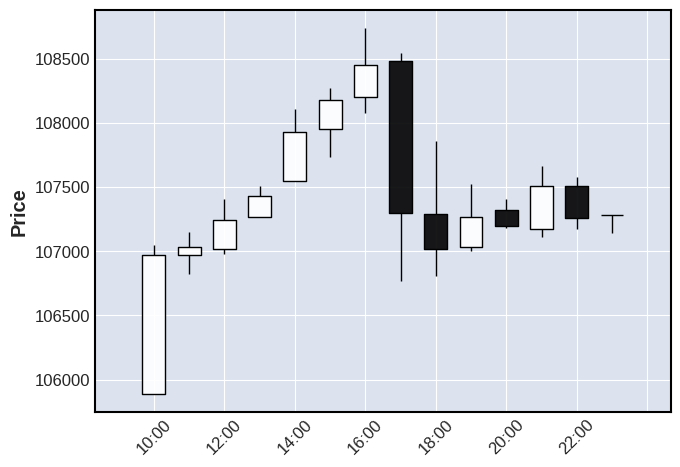

In [5]:
mpf.plot(ohlc, type='candlestick', no_xgaps = True)